## PAIR PROGRAMMING VISUALIZACIÓN I - MATPLOTLIB
---

In [3]:
# Importamos las librerias necesarias 

import matplotlib.pyplot as plt 
import pandas as pd

In [4]:
# Cargamos y abrimos el archivo csv con el que vamos a trabajar

df = pd.read_csv('attacks2.csv')
df.head(2)

,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,AdysonÂ McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...


Tendréis que realizar gráficas para contestar a las siguientes preguntas:


**EJERCICIO 1**

¿Cuál es la frecuencia de cada una de las categorías de la columna sex?

In [5]:
# realizamos todo el código anterior en una línea de código
df_frec = (df['sex_'].value_counts().reset_index())
df_frec


,index,sex_
0,M,4939
1,F,619
2,M,2
3,N,2
4,lli,1
5,.,1


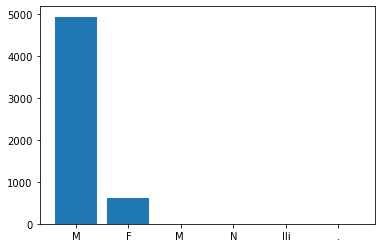

In [6]:
# Visualizamos las frecuencias en un diagrama de barras (bar plot)

plt.figure()

plt.bar(df_frec["index"],df_frec["sex_"])

plt.show()


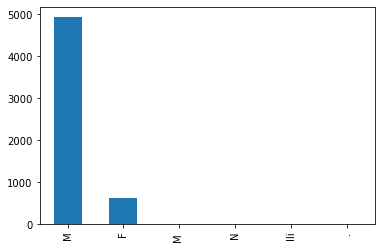

In [7]:
# Otra opción de hacerlo 

plt.figure()
df['sex_'].value_counts().plot(kind='bar');

---

**EJERCICIO 2**

¿Cuál es el porcentaje de nulos por columna? Usa un pie chart donde incluyáis el porcentaje de cada variable en el interior del quesito. Para eso tendréis que usar el parámetro autopct, aquí algo de documentación.

In [8]:
df_nulos= df.isnull().sum().reset_index() 
df_nulos

,index,0
0,case_number,1
1,unnamed:_0,0
2,year,0
3,type,4
4,country,40
5,area,408
6,location,488
7,activity,511
8,name,200
9,sex_,550


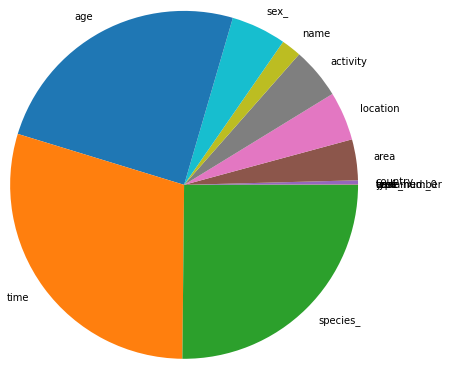

In [9]:
# Iniciamos la figura
plt.figure()

# Querremos visualizar el porcentaje de las variables en un pie chart
plt.pie(df_nulos[0], labels = df_nulos["index"], radius = 2)

# Mostramos al gráfica
plt.show();

---


**EJERCICIO 3**

¿Cuál es el número total de valores únicos de cada una de las columnas categóricas del DataFrame?

In [11]:
df_categoricas = df.select_dtypes(include = "object").reset_index()
df_categoricas.head(2)

,index,case_number,type,country,area,location,activity,name,sex_,age,time,species_,href
0,0,2018.06.25,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,1,2018.06.18,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,AdysonÂ McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...


In [12]:
columnas_categoricas = df_categoricas.columns
columnas_categoricas

Index(['index', 'case_number', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'time', 'species_', 'href'],
      dtype='object')

In [13]:
# Hacemos un for loop para obtener los valores únicos con el método .unique() de cada columna del df_categoricas
# guardándolo en una lista para usar después

valores_unicos= []

for col in columnas_categoricas:
    valores_unicos.append(len(df_categoricas[col].unique()))

print(valores_unicos)

[6114, 6114, 9, 202, 792, 4021, 1485, 5119, 7, 157, 367, 1530, 6099]


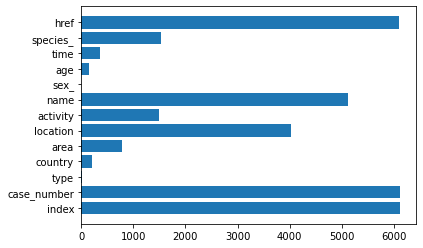

In [14]:
# Visualizamos los resultados en un barhplot

plt.figure()

plt.barh(columnas_categoricas, valores_unicos)

plt.show() 

---

**EJERCICIO 4**

Filtrad los datos para quedarnos solo con los datos de USA.

- ¿Cuántos ataques de tiburones hubo en USA a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.


In [15]:
# Filtramos  por el pais USA

df_usa = df[df['country'] == 'USA'].reset_index()
df_usa.head(2)

,index,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href
0,0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,1,2018.06.18,1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,AdysonÂ McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...


In [16]:
# Volvemos a filtrar agrupando y contando los ataques por años 

df_usa_año = pd.DataFrame(df_usa.groupby('year')['case_number'].count()).reset_index()
df_usa_año.head()

,year,case_number
0,1803.0,1
1,1805.0,1
2,1810.0,1
3,1816.0,1
4,1817.0,1


In [17]:
# Filtramos a partir del año 2000

df_usa_2000 = df_usa_año[df_usa_año['year'] >= 2000]
df_usa_2000.head(2)

,year,case_number
155,2000.0,52
156,2001.0,58


- En función del tipo, ¿cuántos ataques de tiburones de cada tipo hubo en USA? Muestra los resultados en un gráfico de línea.

In [28]:
# Agrupamos y contamos los ataques por tipo de accidente

df_usa_tipo = pd.DataFrame(df_usa.groupby('type')['case_number'].count()).reset_index()
df_usa_tipo.head()

,type,case_number
0,Boat,23
1,Boating,52
2,Invalid,191
3,Provoked,204
4,Sea Disaster,32


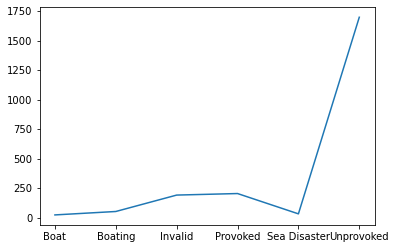

In [29]:
plt.figure()

plt.plot(df_usa_tipo["type"], df_usa_tipo["case_number"])

plt.show() 

---

**EJERCICIO 5**

Filtrad los datos para Spain:

- ¿Cuántos ataques de tiburones hubo en España a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.

- En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en España? Muestra los resultados en un gráfico de línea.

In [30]:
# Como en el ejercicio anterior filtramos  por el pais, en este caso por España

df_usa = df[df['country'] == 'SPAIN'].reset_index()
df_usa.head(2)

,index,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href
0,82,2017.09.16.b,82,2017.0,Unprovoked,SPAIN,Canary Islands,Gran Canaria,Body surfing,male,M,13,NaN,"Porbeagle, 1.5 m",http://sharkattackfile.net/spreadsheets/pdf_di...
1,98,2017.08.26.b,98,2017.0,Invalid,SPAIN,CastellÃ³n,Grao de Moncofa,Swimming,female,F,11,Midday,Shark involvement questionable,http://sharkattackfile.net/spreadsheets/pdf_di...


In [31]:
# Volvemos a filtrar agrupando y contando los ataques por años 

df_usa_año = pd.DataFrame(df_usa.groupby('year')['case_number'].count()).reset_index()
df_usa_año.head()

,year,case_number
0,1819.0,1
1,1836.0,1
2,1862.0,5
3,1864.0,1
4,1879.0,1


In [32]:
# Filtramos a partir del año 2000

df_usa_2000 = df_usa_año[df_usa_año['year'] >= 2000.0]
df_usa_2000.head(2)

,year,case_number
20,2006.0,1
21,2009.0,1


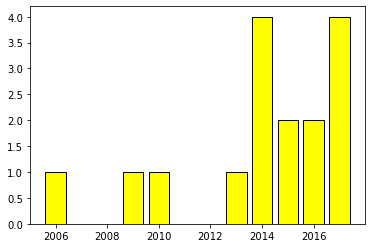

In [33]:
# Visualizamos los resultados en un barplot

plt.figure()

plt.bar(df_usa_2000['year'],df_usa_2000['case_number'], facecolor = 'yellow', edgecolor = "black")

plt.show() 

In [34]:
# Agrupamos y contamos los ataques por tipo de accidente

df_usa_tipo = pd.DataFrame(df_usa.groupby('type')['case_number'].count()).reset_index()
df_usa_tipo.head()

,type,case_number
0,Boating,1
1,Invalid,10
2,Provoked,5
3,Unprovoked,26


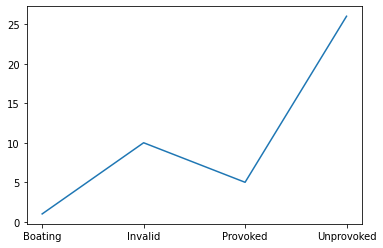

In [35]:
plt.figure()

plt.plot(df_usa_tipo["type"], df_usa_tipo["case_number"])

plt.show() 